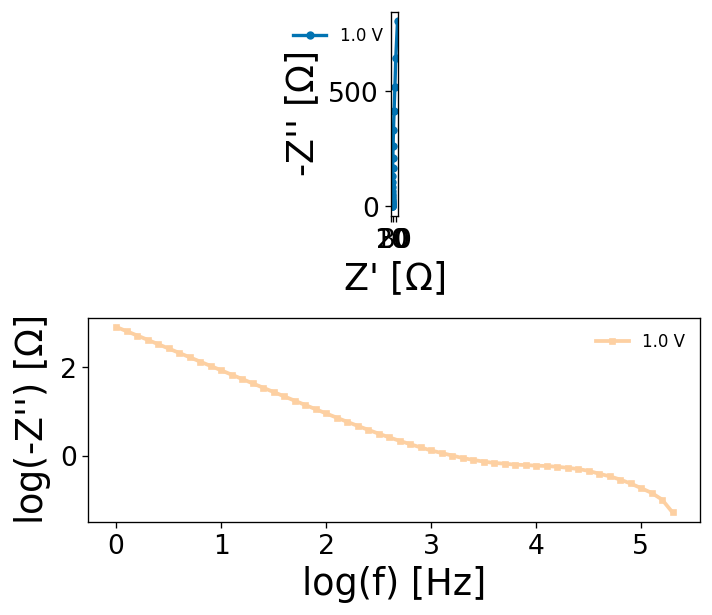

In [3]:
from PyEIS import *
folder='MPT files/'
filename = "1_00V_10cyc.mpt"

ex1 = EIS_exp(path=folder, data=[filename])
ex1.EIS_plot(legend='potential', bode='log_im')



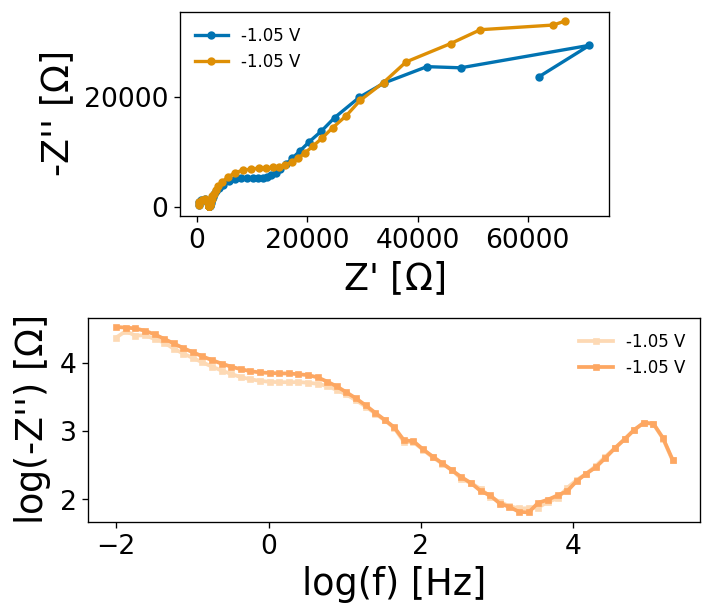

In [4]:
ex1 = EIS_exp(path='ASCII files/', data=['ex1.mpt'])   #### 1_00V_10cyc.csv
ex1.EIS_plot(legend='potential', bode='log_im')
